# Sama Surya Homework Set 1

In [1]:
import GA2048 # Note that you must have the proper directory structure 
              # and installed the files for this to work

%pylab inline

import sympy as sp
import fmt # You can do this IF you have imported GA2048 above

Populating the interactive namespace from numpy and matplotlib


## Problem 1 (5 points):

Set up your Python and IPython notebook environment with the proper directory structure and show case the following IPython functionalities:
1. Determine the the `Python` version you are using.
2. use ? or help() to show comments (`docstring`) of a `Python` function
3. use `%debug` to debug the following code, show how to print out the value of inputs using the debugger. [Tip](https://chrieke.medium.com/jupyter-tips-and-tricks-994fdddb2057)

## Problem 1 Solution:

In [6]:
# It is often helpful to know what version of python you are using
from platform import python_version
python_version()


'3.7.3'

In [2]:
help(docstring)

Help on module matplotlib.docstring in matplotlib:

NAME
    matplotlib.docstring

CLASSES
    builtins.object
        Appender
        Substitution
    
    class Appender(builtins.object)
     |  Appender(*args, **kwargs)
     |  
     |  [*Deprecated*]     A function decorator that will append an addendum to the docstring
     |      of the target function.
     |  
     |      This decorator should be robust even if func.__doc__ is None
     |      (for example, if -OO was passed to the interpreter).
     |  
     |      Usage: construct a docstring.Appender with a string to be joined to
     |      the original docstring. An optional 'join' parameter may be supplied
     |      which will be used to join the docstring and addendum. e.g.
     |  
     |      add_copyright = Appender("Copyright (c) 2009", join='
     |  ')
     |  
     |      @add_copyright
     |      def my_dog(has='fleas'):
     |          "This docstring will have a copyright below"
     |          pass
     | 

In [124]:
def div(a, b) :
    return a/b
c = 3
d = 6
print(div(c,d))
print( div(3, 0))

0.5


ZeroDivisionError: division by zero

In [125]:
%debug

> <ipython-input-124-156cc99a2b49>(2)div()
      1 def div(a, b) :
----> 2     return a/b
      3 c = 3
      4 d = 6
      5 print(div(c,d))

ipdb> print(c,d)
3 6
ipdb> print(a,b)
3 0
ipdb> q


## Problem 2 (10 points):
Is there anything wrong with the code below? How would you modify it? Please demonstrate. Explain why `while loops` are usually avoided.

In [36]:
x = 0.0
while not x == 1.0:
    x = x + 0.1
    print ( " x =%19.17f" % ( x ))

 x =0.10000000000000001
 x =0.20000000000000001
 x =0.30000000000000004
 x =0.40000000000000002
 x =0.50000000000000000
 x =0.59999999999999998
 x =0.69999999999999996
 x =0.79999999999999993
 x =0.89999999999999991
 x =0.99999999999999989
 x =1.09999999999999987


## Problem 2 Solution:
There is nothin gwrong with the code given in the question, but the operation is being done on a floating point arithmetic so after adding up to 1 the while loop is still continuing since the floating point result of the loop is not exactly one it is 1.09. So by changing the equal to sign to less than sign and removing "not", the loop will stop once the desired integer value gets computed. Another way to do this is changing x = x + 0.1 to x = round(x + 0.1 , 1) the 1 indicating the one decimal point limit and in this case there is no need to change the equal to sign in the beginning of the loop. These two methods are in the two cells below. Typically the while loops are avoided because, if the condition specified in the loop is not satisfied then the loop will go on and do infinite iterations which is counter productive. Also in this case we are using the loop to perform arithmetic operations on floating point numbers and there are high chances of the while loop turning into an infinite loop due to the inexactness of arithmetic operations using floating point numbers.

In [37]:
x = 0.0
while  x < 1.0:
    x = x + 0.1
    print ( " x =%19.17f" % ( x ))

 x =0.10000000000000001
 x =0.20000000000000001
 x =0.30000000000000004
 x =0.40000000000000002
 x =0.50000000000000000
 x =0.59999999999999998
 x =0.69999999999999996
 x =0.79999999999999993
 x =0.89999999999999991
 x =0.99999999999999989
 x =1.09999999999999987


In [38]:
x = 0.0
while not x == 1.0:
    x = round(x + 0.1 , 1)
    print ( " x =%19.17f" % ( x ))

 x =0.10000000000000001
 x =0.20000000000000001
 x =0.29999999999999999
 x =0.40000000000000002
 x =0.50000000000000000
 x =0.59999999999999998
 x =0.69999999999999996
 x =0.80000000000000004
 x =0.90000000000000002
 x =1.00000000000000000


## Problem 3 (20 points):
It is possible to use symbolic code to eliminate round off errors using `sympy`, see the code below. Why don't we avoid these complications this way? Modify the code below and plot the time required each loop as n ranges from 1 to 100,000.

In [66]:
from sympy import Rational
dx_symbolic = Rational (1 ,10)
dx = 0.1

def loop_sympy (n):
    x = 0
    for i in range(n):
        x = x + dx_symbolic
    return x

def loop_float(n):
    x =0
    for i in range(n):
        x = x + dx
    return x

def time_this (f, n):
    import time
    starttime = time.time()
    result = f(n)
    stoptime = time.time()
    print(" deviation is %16.15g" % ( n * dx_symbolic - result ))
    return stoptime - starttime

n = 100000
print("loop using float dx:")
time_float = time_this(loop_float, n)
print("float loop n=%d takes %6.5f seconds" % (n, time_float))
print("loop using sympy symbolic dx:")
time_sympy = time_this (loop_sympy, n)
print("sympy loop n =% d takes %6.5f seconds" % (n , time_sympy ))
print("Symbolic loop is a factor %.1f slower." % ( time_sympy / time_float ))

loop using float dx:
 deviation is -1.88483681995422e-08
float loop n=100000 takes 0.00694 seconds
loop using sympy symbolic dx:
 deviation is                0
sympy loop n = 100000 takes 1.40956 seconds
Symbolic loop is a factor 203.1 slower.


## Problem 3 Solution:

In [74]:
timings_sympy = []
n_list = []
for n in range(1, 10001):
    timing = time_this(loop_sympy, n) #timing the computation for the specified range
    timings_sympy.append(timing)# gathering the timings for each iteration
    n_list.append(n)# gathering the iterations for the plot
    print(n)

 deviation is                0
1
 deviation is                0
2
 deviation is                0
3
 deviation is                0
4
 deviation is                0
5
 deviation is                0
6
 deviation is                0
7
 deviation is                0
8
 deviation is                0
9
 deviation is                0
10
 deviation is                0
11
 deviation is                0
12
 deviation is                0
13
 deviation is                0
14
 deviation is                0
15
 deviation is                0
16
 deviation is                0
17
 deviation is                0
18
 deviation is                0
19
 deviation is                0
20
 deviation is                0
21
 deviation is                0
22
 deviation is                0
23
 deviation is                0
24
 deviation is                0
25
 deviation is                0
26
 deviation is                0
27
 deviation is                0
28
 deviation is                0
29
 deviation is          

545
 deviation is                0
546
 deviation is                0
547
 deviation is                0
548
 deviation is                0
549
 deviation is                0
550
 deviation is                0
551
 deviation is                0
552
 deviation is                0
553
 deviation is                0
554
 deviation is                0
555
 deviation is                0
556
 deviation is                0
557
 deviation is                0
558
 deviation is                0
559
 deviation is                0
560
 deviation is                0
561
 deviation is                0
562
 deviation is                0
563
 deviation is                0
564
 deviation is                0
565
 deviation is                0
566
 deviation is                0
567
 deviation is                0
568
 deviation is                0
569
 deviation is                0
570
 deviation is                0
571
 deviation is                0
572
 deviation is                0
573
 deviation is   

 deviation is                0
994
 deviation is                0
995
 deviation is                0
996
 deviation is                0
997
 deviation is                0
998
 deviation is                0
999
 deviation is                0
1000
 deviation is                0
1001
 deviation is                0
1002
 deviation is                0
1003
 deviation is                0
1004
 deviation is                0
1005
 deviation is                0
1006
 deviation is                0
1007
 deviation is                0
1008
 deviation is                0
1009
 deviation is                0
1010
 deviation is                0
1011
 deviation is                0
1012
 deviation is                0
1013
 deviation is                0
1014
 deviation is                0
1015
 deviation is                0
1016
 deviation is                0
1017
 deviation is                0
1018
 deviation is                0
1019
 deviation is                0
1020
 deviation is                0
102

 deviation is                0
1225
 deviation is                0
1226
 deviation is                0
1227
 deviation is                0
1228
 deviation is                0
1229
 deviation is                0
1230
 deviation is                0
1231
 deviation is                0
1232
 deviation is                0
1233
 deviation is                0
1234
 deviation is                0
1235
 deviation is                0
1236
 deviation is                0
1237
 deviation is                0
1238
 deviation is                0
1239
 deviation is                0
1240
 deviation is                0
1241
 deviation is                0
1242
 deviation is                0
1243
 deviation is                0
1244
 deviation is                0
1245
 deviation is                0
1246
 deviation is                0
1247
 deviation is                0
1248
 deviation is                0
1249
 deviation is                0
1250
 deviation is                0
1251
 deviation is               

 deviation is                0
1457
 deviation is                0
1458
 deviation is                0
1459
 deviation is                0
1460
 deviation is                0
1461
 deviation is                0
1462
 deviation is                0
1463
 deviation is                0
1464
 deviation is                0
1465
 deviation is                0
1466
 deviation is                0
1467
 deviation is                0
1468
 deviation is                0
1469
 deviation is                0
1470
 deviation is                0
1471
 deviation is                0
1472
 deviation is                0
1473
 deviation is                0
1474
 deviation is                0
1475
 deviation is                0
1476
 deviation is                0
1477
 deviation is                0
1478
 deviation is                0
1479
 deviation is                0
1480
 deviation is                0
1481
 deviation is                0
1482
 deviation is                0
1483
 deviation is               

 deviation is                0
1685
 deviation is                0
1686
 deviation is                0
1687
 deviation is                0
1688
 deviation is                0
1689
 deviation is                0
1690
 deviation is                0
1691
 deviation is                0
1692
 deviation is                0
1693
 deviation is                0
1694
 deviation is                0
1695
 deviation is                0
1696
 deviation is                0
1697
 deviation is                0
1698
 deviation is                0
1699
 deviation is                0
1700
 deviation is                0
1701
 deviation is                0
1702
 deviation is                0
1703
 deviation is                0
1704
 deviation is                0
1705
 deviation is                0
1706
 deviation is                0
1707
 deviation is                0
1708
 deviation is                0
1709
 deviation is                0
1710
 deviation is                0
1711
 deviation is               

 deviation is                0
1915
 deviation is                0
1916
 deviation is                0
1917
 deviation is                0
1918
 deviation is                0
1919
 deviation is                0
1920
 deviation is                0
1921
 deviation is                0
1922
 deviation is                0
1923
 deviation is                0
1924
 deviation is                0
1925
 deviation is                0
1926
 deviation is                0
1927
 deviation is                0
1928
 deviation is                0
1929
 deviation is                0
1930
 deviation is                0
1931
 deviation is                0
1932
 deviation is                0
1933
 deviation is                0
1934
 deviation is                0
1935
 deviation is                0
1936
 deviation is                0
1937
 deviation is                0
1938
 deviation is                0
1939
 deviation is                0
1940
 deviation is                0
1941
 deviation is               

 deviation is                0
2146
 deviation is                0
2147
 deviation is                0
2148
 deviation is                0
2149
 deviation is                0
2150
 deviation is                0
2151
 deviation is                0
2152
 deviation is                0
2153
 deviation is                0
2154
 deviation is                0
2155
 deviation is                0
2156
 deviation is                0
2157
 deviation is                0
2158
 deviation is                0
2159
 deviation is                0
2160
 deviation is                0
2161
 deviation is                0
2162
 deviation is                0
2163
 deviation is                0
2164
 deviation is                0
2165
 deviation is                0
2166
 deviation is                0
2167
 deviation is                0
2168
 deviation is                0
2169
 deviation is                0
2170
 deviation is                0
2171
 deviation is                0
2172
 deviation is               

 deviation is                0
2375
 deviation is                0
2376
 deviation is                0
2377
 deviation is                0
2378
 deviation is                0
2379
 deviation is                0
2380
 deviation is                0
2381
 deviation is                0
2382
 deviation is                0
2383
 deviation is                0
2384
 deviation is                0
2385
 deviation is                0
2386
 deviation is                0
2387
 deviation is                0
2388
 deviation is                0
2389
 deviation is                0
2390
 deviation is                0
2391
 deviation is                0
2392
 deviation is                0
2393
 deviation is                0
2394
 deviation is                0
2395
 deviation is                0
2396
 deviation is                0
2397
 deviation is                0
2398
 deviation is                0
2399
 deviation is                0
2400
 deviation is                0
2401
 deviation is               

 deviation is                0
2603
 deviation is                0
2604
 deviation is                0
2605
 deviation is                0
2606
 deviation is                0
2607
 deviation is                0
2608
 deviation is                0
2609
 deviation is                0
2610
 deviation is                0
2611
 deviation is                0
2612
 deviation is                0
2613
 deviation is                0
2614
 deviation is                0
2615
 deviation is                0
2616
 deviation is                0
2617
 deviation is                0
2618
 deviation is                0
2619
 deviation is                0
2620
 deviation is                0
2621
 deviation is                0
2622
 deviation is                0
2623
 deviation is                0
2624
 deviation is                0
2625
 deviation is                0
2626
 deviation is                0
2627
 deviation is                0
2628
 deviation is                0
2629
 deviation is               

 deviation is                0
2835
 deviation is                0
2836
 deviation is                0
2837
 deviation is                0
2838
 deviation is                0
2839
 deviation is                0
2840
 deviation is                0
2841
 deviation is                0
2842
 deviation is                0
2843
 deviation is                0
2844
 deviation is                0
2845
 deviation is                0
2846
 deviation is                0
2847
 deviation is                0
2848
 deviation is                0
2849
 deviation is                0
2850
 deviation is                0
2851
 deviation is                0
2852
 deviation is                0
2853
 deviation is                0
2854
 deviation is                0
2855
 deviation is                0
2856
 deviation is                0
2857
 deviation is                0
2858
 deviation is                0
2859
 deviation is                0
2860
 deviation is                0
2861
 deviation is               

 deviation is                0
3063
 deviation is                0
3064
 deviation is                0
3065
 deviation is                0
3066
 deviation is                0
3067
 deviation is                0
3068
 deviation is                0
3069
 deviation is                0
3070
 deviation is                0
3071
 deviation is                0
3072
 deviation is                0
3073
 deviation is                0
3074
 deviation is                0
3075
 deviation is                0
3076
 deviation is                0
3077
 deviation is                0
3078
 deviation is                0
3079
 deviation is                0
3080
 deviation is                0
3081
 deviation is                0
3082
 deviation is                0
3083
 deviation is                0
3084
 deviation is                0
3085
 deviation is                0
3086
 deviation is                0
3087
 deviation is                0
3088
 deviation is                0
3089
 deviation is               

 deviation is                0
3291
 deviation is                0
3292
 deviation is                0
3293
 deviation is                0
3294
 deviation is                0
3295
 deviation is                0
3296
 deviation is                0
3297
 deviation is                0
3298
 deviation is                0
3299
 deviation is                0
3300
 deviation is                0
3301
 deviation is                0
3302
 deviation is                0
3303
 deviation is                0
3304
 deviation is                0
3305
 deviation is                0
3306
 deviation is                0
3307
 deviation is                0
3308
 deviation is                0
3309
 deviation is                0
3310
 deviation is                0
3311
 deviation is                0
3312
 deviation is                0
3313
 deviation is                0
3314
 deviation is                0
3315
 deviation is                0
3316
 deviation is                0
3317
 deviation is               

 deviation is                0
3520
 deviation is                0
3521
 deviation is                0
3522
 deviation is                0
3523
 deviation is                0
3524
 deviation is                0
3525
 deviation is                0
3526
 deviation is                0
3527
 deviation is                0
3528
 deviation is                0
3529
 deviation is                0
3530
 deviation is                0
3531
 deviation is                0
3532
 deviation is                0
3533
 deviation is                0
3534
 deviation is                0
3535
 deviation is                0
3536
 deviation is                0
3537
 deviation is                0
3538
 deviation is                0
3539
 deviation is                0
3540
 deviation is                0
3541
 deviation is                0
3542
 deviation is                0
3543
 deviation is                0
3544
 deviation is                0
3545
 deviation is                0
3546
 deviation is               

 deviation is                0
3750
 deviation is                0
3751
 deviation is                0
3752
 deviation is                0
3753
 deviation is                0
3754
 deviation is                0
3755
 deviation is                0
3756
 deviation is                0
3757
 deviation is                0
3758
 deviation is                0
3759
 deviation is                0
3760
 deviation is                0
3761
 deviation is                0
3762
 deviation is                0
3763
 deviation is                0
3764
 deviation is                0
3765
 deviation is                0
3766
 deviation is                0
3767
 deviation is                0
3768
 deviation is                0
3769
 deviation is                0
3770
 deviation is                0
3771
 deviation is                0
3772
 deviation is                0
3773
 deviation is                0
3774
 deviation is                0
3775
 deviation is                0
3776
 deviation is               

 deviation is                0
3982
 deviation is                0
3983
 deviation is                0
3984
 deviation is                0
3985
 deviation is                0
3986
 deviation is                0
3987
 deviation is                0
3988
 deviation is                0
3989
 deviation is                0
3990
 deviation is                0
3991
 deviation is                0
3992
 deviation is                0
3993
 deviation is                0
3994
 deviation is                0
3995
 deviation is                0
3996
 deviation is                0
3997
 deviation is                0
3998
 deviation is                0
3999
 deviation is                0
4000
 deviation is                0
4001
 deviation is                0
4002
 deviation is                0
4003
 deviation is                0
4004
 deviation is                0
4005
 deviation is                0
4006
 deviation is                0
4007
 deviation is                0
4008
 deviation is               

 deviation is                0
4211
 deviation is                0
4212
 deviation is                0
4213
 deviation is                0
4214
 deviation is                0
4215
 deviation is                0
4216
 deviation is                0
4217
 deviation is                0
4218
 deviation is                0
4219
 deviation is                0
4220
 deviation is                0
4221
 deviation is                0
4222
 deviation is                0
4223
 deviation is                0
4224
 deviation is                0
4225
 deviation is                0
4226
 deviation is                0
4227
 deviation is                0
4228
 deviation is                0
4229
 deviation is                0
4230
 deviation is                0
4231
 deviation is                0
4232
 deviation is                0
4233
 deviation is                0
4234
 deviation is                0
4235
 deviation is                0
4236
 deviation is                0
4237
 deviation is               

 deviation is                0
4441
 deviation is                0
4442
 deviation is                0
4443
 deviation is                0
4444
 deviation is                0
4445
 deviation is                0
4446
 deviation is                0
4447
 deviation is                0
4448
 deviation is                0
4449
 deviation is                0
4450
 deviation is                0
4451
 deviation is                0
4452
 deviation is                0
4453
 deviation is                0
4454
 deviation is                0
4455
 deviation is                0
4456
 deviation is                0
4457
 deviation is                0
4458
 deviation is                0
4459
 deviation is                0
4460
 deviation is                0
4461
 deviation is                0
4462
 deviation is                0
4463
 deviation is                0
4464
 deviation is                0
4465
 deviation is                0
4466
 deviation is                0
4467
 deviation is               

 deviation is                0
4672
 deviation is                0
4673
 deviation is                0
4674
 deviation is                0
4675
 deviation is                0
4676
 deviation is                0
4677
 deviation is                0
4678
 deviation is                0
4679
 deviation is                0
4680
 deviation is                0
4681
 deviation is                0
4682
 deviation is                0
4683
 deviation is                0
4684
 deviation is                0
4685
 deviation is                0
4686
 deviation is                0
4687
 deviation is                0
4688
 deviation is                0
4689
 deviation is                0
4690
 deviation is                0
4691
 deviation is                0
4692
 deviation is                0
4693
 deviation is                0
4694
 deviation is                0
4695
 deviation is                0
4696
 deviation is                0
4697
 deviation is                0
4698
 deviation is               

 deviation is                0
4902
 deviation is                0
4903
 deviation is                0
4904
 deviation is                0
4905
 deviation is                0
4906
 deviation is                0
4907
 deviation is                0
4908
 deviation is                0
4909
 deviation is                0
4910
 deviation is                0
4911
 deviation is                0
4912
 deviation is                0
4913
 deviation is                0
4914
 deviation is                0
4915
 deviation is                0
4916
 deviation is                0
4917
 deviation is                0
4918
 deviation is                0
4919
 deviation is                0
4920
 deviation is                0
4921
 deviation is                0
4922
 deviation is                0
4923
 deviation is                0
4924
 deviation is                0
4925
 deviation is                0
4926
 deviation is                0
4927
 deviation is                0
4928
 deviation is               

 deviation is                0
5133
 deviation is                0
5134
 deviation is                0
5135
 deviation is                0
5136
 deviation is                0
5137
 deviation is                0
5138
 deviation is                0
5139
 deviation is                0
5140
 deviation is                0
5141
 deviation is                0
5142
 deviation is                0
5143
 deviation is                0
5144
 deviation is                0
5145
 deviation is                0
5146
 deviation is                0
5147
 deviation is                0
5148
 deviation is                0
5149
 deviation is                0
5150
 deviation is                0
5151
 deviation is                0
5152
 deviation is                0
5153
 deviation is                0
5154
 deviation is                0
5155
 deviation is                0
5156
 deviation is                0
5157
 deviation is                0
5158
 deviation is                0
5159
 deviation is               

 deviation is                0
5364
 deviation is                0
5365
 deviation is                0
5366
 deviation is                0
5367
 deviation is                0
5368
 deviation is                0
5369
 deviation is                0
5370
 deviation is                0
5371
 deviation is                0
5372
 deviation is                0
5373
 deviation is                0
5374
 deviation is                0
5375
 deviation is                0
5376
 deviation is                0
5377
 deviation is                0
5378
 deviation is                0
5379
 deviation is                0
5380
 deviation is                0
5381
 deviation is                0
5382
 deviation is                0
5383
 deviation is                0
5384
 deviation is                0
5385
 deviation is                0
5386
 deviation is                0
5387
 deviation is                0
5388
 deviation is                0
5389
 deviation is                0
5390
 deviation is               

 deviation is                0
5594
 deviation is                0
5595
 deviation is                0
5596
 deviation is                0
5597
 deviation is                0
5598
 deviation is                0
5599
 deviation is                0
5600
 deviation is                0
5601
 deviation is                0
5602
 deviation is                0
5603
 deviation is                0
5604
 deviation is                0
5605
 deviation is                0
5606
 deviation is                0
5607
 deviation is                0
5608
 deviation is                0
5609
 deviation is                0
5610
 deviation is                0
5611
 deviation is                0
5612
 deviation is                0
5613
 deviation is                0
5614
 deviation is                0
5615
 deviation is                0
5616
 deviation is                0
5617
 deviation is                0
5618
 deviation is                0
5619
 deviation is                0
5620
 deviation is               

 deviation is                0
5824
 deviation is                0
5825
 deviation is                0
5826
 deviation is                0
5827
 deviation is                0
5828
 deviation is                0
5829
 deviation is                0
5830
 deviation is                0
5831
 deviation is                0
5832
 deviation is                0
5833
 deviation is                0
5834
 deviation is                0
5835
 deviation is                0
5836
 deviation is                0
5837
 deviation is                0
5838
 deviation is                0
5839
 deviation is                0
5840
 deviation is                0
5841
 deviation is                0
5842
 deviation is                0
5843
 deviation is                0
5844
 deviation is                0
5845
 deviation is                0
5846
 deviation is                0
5847
 deviation is                0
5848
 deviation is                0
5849
 deviation is                0
5850
 deviation is               

 deviation is                0
6054
 deviation is                0
6055
 deviation is                0
6056
 deviation is                0
6057
 deviation is                0
6058
 deviation is                0
6059
 deviation is                0
6060
 deviation is                0
6061
 deviation is                0
6062
 deviation is                0
6063
 deviation is                0
6064
 deviation is                0
6065
 deviation is                0
6066
 deviation is                0
6067
 deviation is                0
6068
 deviation is                0
6069
 deviation is                0
6070
 deviation is                0
6071
 deviation is                0
6072
 deviation is                0
6073
 deviation is                0
6074
 deviation is                0
6075
 deviation is                0
6076
 deviation is                0
6077
 deviation is                0
6078
 deviation is                0
6079
 deviation is                0
6080
 deviation is               

 deviation is                0
6285
 deviation is                0
6286
 deviation is                0
6287
 deviation is                0
6288
 deviation is                0
6289
 deviation is                0
6290
 deviation is                0
6291
 deviation is                0
6292
 deviation is                0
6293
 deviation is                0
6294
 deviation is                0
6295
 deviation is                0
6296
 deviation is                0
6297
 deviation is                0
6298
 deviation is                0
6299
 deviation is                0
6300
 deviation is                0
6301
 deviation is                0
6302
 deviation is                0
6303
 deviation is                0
6304
 deviation is                0
6305
 deviation is                0
6306
 deviation is                0
6307
 deviation is                0
6308
 deviation is                0
6309
 deviation is                0
6310
 deviation is                0
6311
 deviation is               

 deviation is                0
6515
 deviation is                0
6516
 deviation is                0
6517
 deviation is                0
6518
 deviation is                0
6519
 deviation is                0
6520
 deviation is                0
6521
 deviation is                0
6522
 deviation is                0
6523
 deviation is                0
6524
 deviation is                0
6525
 deviation is                0
6526
 deviation is                0
6527
 deviation is                0
6528
 deviation is                0
6529
 deviation is                0
6530
 deviation is                0
6531
 deviation is                0
6532
 deviation is                0
6533
 deviation is                0
6534
 deviation is                0
6535
 deviation is                0
6536
 deviation is                0
6537
 deviation is                0
6538
 deviation is                0
6539
 deviation is                0
6540
 deviation is                0
6541
 deviation is               

 deviation is                0
6745
 deviation is                0
6746
 deviation is                0
6747
 deviation is                0
6748
 deviation is                0
6749
 deviation is                0
6750
 deviation is                0
6751
 deviation is                0
6752
 deviation is                0
6753
 deviation is                0
6754
 deviation is                0
6755
 deviation is                0
6756
 deviation is                0
6757
 deviation is                0
6758
 deviation is                0
6759
 deviation is                0
6760
 deviation is                0
6761
 deviation is                0
6762
 deviation is                0
6763
 deviation is                0
6764
 deviation is                0
6765
 deviation is                0
6766
 deviation is                0
6767
 deviation is                0
6768
 deviation is                0
6769
 deviation is                0
6770
 deviation is                0
6771
 deviation is               

 deviation is                0
6975
 deviation is                0
6976
 deviation is                0
6977
 deviation is                0
6978
 deviation is                0
6979
 deviation is                0
6980
 deviation is                0
6981
 deviation is                0
6982
 deviation is                0
6983
 deviation is                0
6984
 deviation is                0
6985
 deviation is                0
6986
 deviation is                0
6987
 deviation is                0
6988
 deviation is                0
6989
 deviation is                0
6990
 deviation is                0
6991
 deviation is                0
6992
 deviation is                0
6993
 deviation is                0
6994
 deviation is                0
6995
 deviation is                0
6996
 deviation is                0
6997
 deviation is                0
6998
 deviation is                0
6999
 deviation is                0
7000
 deviation is                0
7001
 deviation is               

 deviation is                0
7204
 deviation is                0
7205
 deviation is                0
7206
 deviation is                0
7207
 deviation is                0
7208
 deviation is                0
7209
 deviation is                0
7210
 deviation is                0
7211
 deviation is                0
7212
 deviation is                0
7213
 deviation is                0
7214
 deviation is                0
7215
 deviation is                0
7216
 deviation is                0
7217
 deviation is                0
7218
 deviation is                0
7219
 deviation is                0
7220
 deviation is                0
7221
 deviation is                0
7222
 deviation is                0
7223
 deviation is                0
7224
 deviation is                0
7225
 deviation is                0
7226
 deviation is                0
7227
 deviation is                0
7228
 deviation is                0
7229
 deviation is                0
7230
 deviation is               

 deviation is                0
7432
 deviation is                0
7433
 deviation is                0
7434
 deviation is                0
7435
 deviation is                0
7436
 deviation is                0
7437
 deviation is                0
7438
 deviation is                0
7439
 deviation is                0
7440
 deviation is                0
7441
 deviation is                0
7442
 deviation is                0
7443
 deviation is                0
7444
 deviation is                0
7445
 deviation is                0
7446
 deviation is                0
7447
 deviation is                0
7448
 deviation is                0
7449
 deviation is                0
7450
 deviation is                0
7451
 deviation is                0
7452
 deviation is                0
7453
 deviation is                0
7454
 deviation is                0
7455
 deviation is                0
7456
 deviation is                0
7457
 deviation is                0
7458
 deviation is               

 deviation is                0
7660
 deviation is                0
7661
 deviation is                0
7662
 deviation is                0
7663
 deviation is                0
7664
 deviation is                0
7665
 deviation is                0
7666
 deviation is                0
7667
 deviation is                0
7668
 deviation is                0
7669
 deviation is                0
7670
 deviation is                0
7671
 deviation is                0
7672
 deviation is                0
7673
 deviation is                0
7674
 deviation is                0
7675
 deviation is                0
7676
 deviation is                0
7677
 deviation is                0
7678
 deviation is                0
7679
 deviation is                0
7680
 deviation is                0
7681
 deviation is                0
7682
 deviation is                0
7683
 deviation is                0
7684
 deviation is                0
7685
 deviation is                0
7686
 deviation is               

 deviation is                0
7888
 deviation is                0
7889
 deviation is                0
7890
 deviation is                0
7891
 deviation is                0
7892
 deviation is                0
7893
 deviation is                0
7894
 deviation is                0
7895
 deviation is                0
7896
 deviation is                0
7897
 deviation is                0
7898
 deviation is                0
7899
 deviation is                0
7900
 deviation is                0
7901
 deviation is                0
7902
 deviation is                0
7903
 deviation is                0
7904
 deviation is                0
7905
 deviation is                0
7906
 deviation is                0
7907
 deviation is                0
7908
 deviation is                0
7909
 deviation is                0
7910
 deviation is                0
7911
 deviation is                0
7912
 deviation is                0
7913
 deviation is                0
7914
 deviation is               

 deviation is                0
8118
 deviation is                0
8119
 deviation is                0
8120
 deviation is                0
8121
 deviation is                0
8122
 deviation is                0
8123
 deviation is                0
8124
 deviation is                0
8125
 deviation is                0
8126
 deviation is                0
8127
 deviation is                0
8128
 deviation is                0
8129
 deviation is                0
8130
 deviation is                0
8131
 deviation is                0
8132
 deviation is                0
8133
 deviation is                0
8134
 deviation is                0
8135
 deviation is                0
8136
 deviation is                0
8137
 deviation is                0
8138
 deviation is                0
8139
 deviation is                0
8140
 deviation is                0
8141
 deviation is                0
8142
 deviation is                0
8143
 deviation is                0
8144
 deviation is               

 deviation is                0
8347
 deviation is                0
8348
 deviation is                0
8349
 deviation is                0
8350
 deviation is                0
8351
 deviation is                0
8352
 deviation is                0
8353
 deviation is                0
8354
 deviation is                0
8355
 deviation is                0
8356
 deviation is                0
8357
 deviation is                0
8358
 deviation is                0
8359
 deviation is                0
8360
 deviation is                0
8361
 deviation is                0
8362
 deviation is                0
8363
 deviation is                0
8364
 deviation is                0
8365
 deviation is                0
8366
 deviation is                0
8367
 deviation is                0
8368
 deviation is                0
8369
 deviation is                0
8370
 deviation is                0
8371
 deviation is                0
8372
 deviation is                0
8373
 deviation is               

 deviation is                0
8575
 deviation is                0
8576
 deviation is                0
8577
 deviation is                0
8578
 deviation is                0
8579
 deviation is                0
8580
 deviation is                0
8581
 deviation is                0
8582
 deviation is                0
8583
 deviation is                0
8584
 deviation is                0
8585
 deviation is                0
8586
 deviation is                0
8587
 deviation is                0
8588
 deviation is                0
8589
 deviation is                0
8590
 deviation is                0
8591
 deviation is                0
8592
 deviation is                0
8593
 deviation is                0
8594
 deviation is                0
8595
 deviation is                0
8596
 deviation is                0
8597
 deviation is                0
8598
 deviation is                0
8599
 deviation is                0
8600
 deviation is                0
8601
 deviation is               

 deviation is                0
8804
 deviation is                0
8805
 deviation is                0
8806
 deviation is                0
8807
 deviation is                0
8808
 deviation is                0
8809
 deviation is                0
8810
 deviation is                0
8811
 deviation is                0
8812
 deviation is                0
8813
 deviation is                0
8814
 deviation is                0
8815
 deviation is                0
8816
 deviation is                0
8817
 deviation is                0
8818
 deviation is                0
8819
 deviation is                0
8820
 deviation is                0
8821
 deviation is                0
8822
 deviation is                0
8823
 deviation is                0
8824
 deviation is                0
8825
 deviation is                0
8826
 deviation is                0
8827
 deviation is                0
8828
 deviation is                0
8829
 deviation is                0
8830
 deviation is               

 deviation is                0
9032
 deviation is                0
9033
 deviation is                0
9034
 deviation is                0
9035
 deviation is                0
9036
 deviation is                0
9037
 deviation is                0
9038
 deviation is                0
9039
 deviation is                0
9040
 deviation is                0
9041
 deviation is                0
9042
 deviation is                0
9043
 deviation is                0
9044
 deviation is                0
9045
 deviation is                0
9046
 deviation is                0
9047
 deviation is                0
9048
 deviation is                0
9049
 deviation is                0
9050
 deviation is                0
9051
 deviation is                0
9052
 deviation is                0
9053
 deviation is                0
9054
 deviation is                0
9055
 deviation is                0
9056
 deviation is                0
9057
 deviation is                0
9058
 deviation is               

 deviation is                0
9260
 deviation is                0
9261
 deviation is                0
9262
 deviation is                0
9263
 deviation is                0
9264
 deviation is                0
9265
 deviation is                0
9266
 deviation is                0
9267
 deviation is                0
9268
 deviation is                0
9269
 deviation is                0
9270
 deviation is                0
9271
 deviation is                0
9272
 deviation is                0
9273
 deviation is                0
9274
 deviation is                0
9275
 deviation is                0
9276
 deviation is                0
9277
 deviation is                0
9278
 deviation is                0
9279
 deviation is                0
9280
 deviation is                0
9281
 deviation is                0
9282
 deviation is                0
9283
 deviation is                0
9284
 deviation is                0
9285
 deviation is                0
9286
 deviation is               

 deviation is                0
9488
 deviation is                0
9489
 deviation is                0
9490
 deviation is                0
9491
 deviation is                0
9492
 deviation is                0
9493
 deviation is                0
9494
 deviation is                0
9495
 deviation is                0
9496
 deviation is                0
9497
 deviation is                0
9498
 deviation is                0
9499
 deviation is                0
9500
 deviation is                0
9501
 deviation is                0
9502
 deviation is                0
9503
 deviation is                0
9504
 deviation is                0
9505
 deviation is                0
9506
 deviation is                0
9507
 deviation is                0
9508
 deviation is                0
9509
 deviation is                0
9510
 deviation is                0
9511
 deviation is                0
9512
 deviation is                0
9513
 deviation is                0
9514
 deviation is               

 deviation is                0
9718
 deviation is                0
9719
 deviation is                0
9720
 deviation is                0
9721
 deviation is                0
9722
 deviation is                0
9723
 deviation is                0
9724
 deviation is                0
9725
 deviation is                0
9726
 deviation is                0
9727
 deviation is                0
9728
 deviation is                0
9729
 deviation is                0
9730
 deviation is                0
9731
 deviation is                0
9732
 deviation is                0
9733
 deviation is                0
9734
 deviation is                0
9735
 deviation is                0
9736
 deviation is                0
9737
 deviation is                0
9738
 deviation is                0
9739
 deviation is                0
9740
 deviation is                0
9741
 deviation is                0
9742
 deviation is                0
9743
 deviation is                0
9744
 deviation is               

 deviation is                0
9947
 deviation is                0
9948
 deviation is                0
9949
 deviation is                0
9950
 deviation is                0
9951
 deviation is                0
9952
 deviation is                0
9953
 deviation is                0
9954
 deviation is                0
9955
 deviation is                0
9956
 deviation is                0
9957
 deviation is                0
9958
 deviation is                0
9959
 deviation is                0
9960
 deviation is                0
9961
 deviation is                0
9962
 deviation is                0
9963
 deviation is                0
9964
 deviation is                0
9965
 deviation is                0
9966
 deviation is                0
9967
 deviation is                0
9968
 deviation is                0
9969
 deviation is                0
9970
 deviation is                0
9971
 deviation is                0
9972
 deviation is                0
9973
 deviation is               

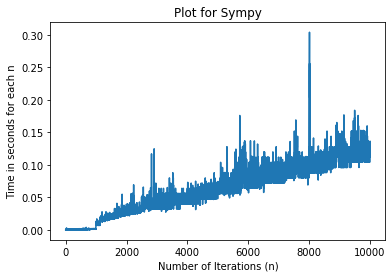

In [85]:
plt.plot(n_list, timings_sympy)# plotting the timings and iterations
plt.xlabel('Number of Iterations (n)')
plt.ylabel('Time in seconds for each n')
plt.title("Plot for Sympy")
plt.show()

In [75]:
timings_float = []
n_list2 = []
for n in range(1, 10001):
    timing = time_this(loop_float, n)
    timings_float.append(timing)
    n_list2.append(n)

 deviation is                0
 deviation is                0
 deviation is -5.55111512312578e-17
 deviation is                0
 deviation is                0
 deviation is                0
 deviation is                0
 deviation is 1.11022302462516e-16
 deviation is 1.11022302462516e-16
 deviation is 1.11022302462516e-16
 deviation is 2.22044604925031e-16
 deviation is                0
 deviation is                0
 deviation is -2.22044604925031e-16
 deviation is -2.22044604925031e-16
 deviation is -2.22044604925031e-16
 deviation is -4.44089209850063e-16
 deviation is -4.44089209850063e-16
 deviation is -6.66133814775094e-16
 deviation is -4.44089209850063e-16
 deviation is -4.44089209850063e-16
 deviation is -4.44089209850063e-16
 deviation is -8.88178419700125e-16
 deviation is -8.88178419700125e-16
 deviation is -8.88178419700125e-16
 deviation is -8.88178419700125e-16
 deviation is -8.88178419700125e-16
 deviation is -1.33226762955019e-15
 deviation is -1.33226762955019e-15


 deviation is 6.96331881044898e-13
 deviation is 7.105427357601e-13
 deviation is 7.105427357601e-13
 deviation is 7.24753590475302e-13
 deviation is 7.24753590475302e-13
 deviation is 7.24753590475302e-13
 deviation is 7.38964445190504e-13
 deviation is 7.38964445190504e-13
 deviation is 7.53175299905706e-13
 deviation is 7.53175299905706e-13
 deviation is 7.53175299905706e-13
 deviation is 7.67386154620908e-13
 deviation is 7.67386154620908e-13
 deviation is 7.8159700933611e-13
 deviation is 7.8159700933611e-13
 deviation is 7.8159700933611e-13
 deviation is 7.95807864051312e-13
 deviation is 7.95807864051312e-13
 deviation is 8.10018718766514e-13
 deviation is 8.10018718766514e-13
 deviation is 8.10018718766514e-13
 deviation is 8.24229573481716e-13
 deviation is 8.24229573481716e-13
 deviation is 8.38440428196918e-13
 deviation is 8.38440428196918e-13
 deviation is 8.38440428196918e-13
 deviation is 8.5265128291212e-13
 deviation is 8.5265128291212e-13
 deviation is 8.6686213762732

 deviation is 5.00222085975111e-12
 deviation is 5.00222085975111e-12
 deviation is 5.00222085975111e-12
 deviation is 5.00222085975111e-12
 deviation is 5.03064256918151e-12
 deviation is 5.03064256918151e-12
 deviation is 5.03064256918151e-12
 deviation is 5.03064256918151e-12
 deviation is 5.03064256918151e-12
 deviation is 5.05906427861191e-12
 deviation is 5.05906427861191e-12
 deviation is 5.05906427861191e-12
 deviation is 5.05906427861191e-12
 deviation is 5.05906427861191e-12
 deviation is 5.08748598804232e-12
 deviation is 5.08748598804232e-12
 deviation is 5.08748598804232e-12
 deviation is 5.08748598804232e-12
 deviation is 5.08748598804232e-12
 deviation is 5.11590769747272e-12
 deviation is 5.11590769747272e-12
 deviation is 5.11590769747272e-12
 deviation is 5.11590769747272e-12
 deviation is 5.11590769747272e-12
 deviation is 5.14432940690313e-12
 deviation is 5.14432940690313e-12
 deviation is 5.14432940690313e-12
 deviation is 5.14432940690313e-12
 deviation is 5.1443

 deviation is 9.69180291576777e-12
 deviation is 9.69180291576777e-12
 deviation is 9.69180291576777e-12
 deviation is 9.72022462519817e-12
 deviation is 9.72022462519817e-12
 deviation is 9.72022462519817e-12
 deviation is 9.72022462519817e-12
 deviation is 9.72022462519817e-12
 deviation is 9.74864633462857e-12
 deviation is 9.74864633462857e-12
 deviation is 9.74864633462857e-12
 deviation is 9.74864633462857e-12
 deviation is 9.74864633462857e-12
 deviation is 9.77706804405898e-12
 deviation is 9.77706804405898e-12
 deviation is 9.77706804405898e-12
 deviation is 9.77706804405898e-12
 deviation is 9.77706804405898e-12
 deviation is 9.80548975348938e-12
 deviation is 9.80548975348938e-12
 deviation is 9.80548975348938e-12
 deviation is 9.80548975348938e-12
 deviation is 9.80548975348938e-12
 deviation is 9.83391146291979e-12
 deviation is 9.83391146291979e-12
 deviation is 9.83391146291979e-12
 deviation is 9.83391146291979e-12
 deviation is 9.83391146291979e-12
 deviation is 9.8623

 deviation is -6.82121026329696e-12
 deviation is -6.87805368215777e-12
 deviation is -6.87805368215777e-12
 deviation is -6.87805368215777e-12
 deviation is -6.93489710101858e-12
 deviation is -6.93489710101858e-12
 deviation is -6.99174051987939e-12
 deviation is -6.99174051987939e-12
 deviation is -6.99174051987939e-12
 deviation is -7.04858393874019e-12
 deviation is -7.04858393874019e-12
 deviation is -7.105427357601e-12
 deviation is -7.105427357601e-12
 deviation is -7.105427357601e-12
 deviation is -7.16227077646181e-12
 deviation is -7.16227077646181e-12
 deviation is -7.21911419532262e-12
 deviation is -7.21911419532262e-12
 deviation is -7.21911419532262e-12
 deviation is -7.27595761418343e-12
 deviation is -7.27595761418343e-12
 deviation is -7.33280103304423e-12
 deviation is -7.33280103304423e-12
 deviation is -7.33280103304423e-12
 deviation is -7.38964445190504e-12
 deviation is -7.38964445190504e-12
 deviation is -7.44648787076585e-12
 deviation is -7.44648787076585e-1

 deviation is -2.19415596802719e-11
 deviation is -2.19415596802719e-11
 deviation is -2.19984030991327e-11
 deviation is -2.19984030991327e-11
 deviation is -2.19984030991327e-11
 deviation is -2.20552465179935e-11
 deviation is -2.20552465179935e-11
 deviation is -2.21120899368543e-11
 deviation is -2.21120899368543e-11
 deviation is -2.21120899368543e-11
 deviation is -2.21689333557151e-11
 deviation is -2.21689333557151e-11
 deviation is -2.22257767745759e-11
 deviation is -2.22257767745759e-11
 deviation is -2.22257767745759e-11
 deviation is -2.22826201934367e-11
 deviation is -2.22826201934367e-11
 deviation is -2.23394636122975e-11
 deviation is -2.23394636122975e-11
 deviation is -2.23394636122975e-11
 deviation is -2.23963070311584e-11
 deviation is -2.23963070311584e-11
 deviation is -2.24531504500192e-11
 deviation is -2.24531504500192e-11
 deviation is -2.24531504500192e-11
 deviation is -2.250999386888e-11
 deviation is -2.250999386888e-11
 deviation is -2.25668372877408e

 deviation is -3.62092578143347e-11
 deviation is -3.62092578143347e-11
 deviation is -3.62661012331955e-11
 deviation is -3.62661012331955e-11
 deviation is -3.63229446520563e-11
 deviation is -3.63229446520563e-11
 deviation is -3.63229446520563e-11
 deviation is -3.63797880709171e-11
 deviation is -3.63797880709171e-11
 deviation is -3.64366314897779e-11
 deviation is -3.64366314897779e-11
 deviation is -3.64366314897779e-11
 deviation is -3.64934749086387e-11
 deviation is -3.64934749086387e-11
 deviation is -3.65503183274996e-11
 deviation is -3.65503183274996e-11
 deviation is -3.65503183274996e-11
 deviation is -3.66071617463604e-11
 deviation is -3.66071617463604e-11
 deviation is -3.66640051652212e-11
 deviation is -3.66640051652212e-11
 deviation is -3.66640051652212e-11
 deviation is -3.6720848584082e-11
 deviation is -3.6720848584082e-11
 deviation is -3.67776920029428e-11
 deviation is -3.67776920029428e-11
 deviation is -3.67776920029428e-11
 deviation is -3.6834535421803

 deviation is -4.84305928694084e-11
 deviation is -4.84305928694084e-11
 deviation is -4.84305928694084e-11
 deviation is -4.854427970713e-11
 deviation is -4.854427970713e-11
 deviation is -4.854427970713e-11
 deviation is -4.854427970713e-11
 deviation is -4.854427970713e-11
 deviation is -4.86579665448517e-11
 deviation is -4.86579665448517e-11
 deviation is -4.86579665448517e-11
 deviation is -4.86579665448517e-11
 deviation is -4.86579665448517e-11
 deviation is -4.87716533825733e-11
 deviation is -4.87716533825733e-11
 deviation is -4.87716533825733e-11
 deviation is -4.87716533825733e-11
 deviation is -4.87716533825733e-11
 deviation is -4.88853402202949e-11
 deviation is -4.88853402202949e-11
 deviation is -4.88853402202949e-11
 deviation is -4.88853402202949e-11
 deviation is -4.88853402202949e-11
 deviation is -4.89990270580165e-11
 deviation is -4.89990270580165e-11
 deviation is -4.89990270580165e-11
 deviation is -4.89990270580165e-11
 deviation is -4.89990270580165e-11
 d

 deviation is -6.28688212600537e-11
 deviation is -6.28688212600537e-11
 deviation is -6.29825080977753e-11
 deviation is -6.29825080977753e-11
 deviation is -6.29825080977753e-11
 deviation is -6.29825080977753e-11
 deviation is -6.29825080977753e-11
 deviation is -6.30961949354969e-11
 deviation is -6.30961949354969e-11
 deviation is -6.30961949354969e-11
 deviation is -6.30961949354969e-11
 deviation is -6.30961949354969e-11
 deviation is -6.32098817732185e-11
 deviation is -6.32098817732185e-11
 deviation is -6.32098817732185e-11
 deviation is -6.32098817732185e-11
 deviation is -6.32098817732185e-11
 deviation is -6.33235686109401e-11
 deviation is -6.33235686109401e-11
 deviation is -6.33235686109401e-11
 deviation is -6.33235686109401e-11
 deviation is -6.33235686109401e-11
 deviation is -6.34372554486617e-11
 deviation is -6.34372554486617e-11
 deviation is -6.34372554486617e-11
 deviation is -6.34372554486617e-11
 deviation is -6.34372554486617e-11
 deviation is -6.35509422863

 deviation is -7.4919626058545e-11
 deviation is -7.4919626058545e-11
 deviation is -7.4919626058545e-11
 deviation is -7.50333128962666e-11
 deviation is -7.50333128962666e-11
 deviation is -7.50333128962666e-11
 deviation is -7.50333128962666e-11
 deviation is -7.50333128962666e-11
 deviation is -7.51469997339882e-11
 deviation is -7.51469997339882e-11
 deviation is -7.51469997339882e-11
 deviation is -7.51469997339882e-11
 deviation is -7.51469997339882e-11
 deviation is -7.52606865717098e-11
 deviation is -7.52606865717098e-11
 deviation is -7.52606865717098e-11
 deviation is -7.52606865717098e-11
 deviation is -7.52606865717098e-11
 deviation is -7.53743734094314e-11
 deviation is -7.53743734094314e-11
 deviation is -7.53743734094314e-11
 deviation is -7.53743734094314e-11
 deviation is -7.53743734094314e-11
 deviation is -7.5488060247153e-11
 deviation is -7.5488060247153e-11
 deviation is -7.5488060247153e-11
 deviation is -7.5488060247153e-11
 deviation is -7.5488060247153e-11


 deviation is -8.84483597474173e-11
 deviation is -8.85620465851389e-11
 deviation is -8.85620465851389e-11
 deviation is -8.85620465851389e-11
 deviation is -8.85620465851389e-11
 deviation is -8.85620465851389e-11
 deviation is -8.86757334228605e-11
 deviation is -8.86757334228605e-11
 deviation is -8.86757334228605e-11
 deviation is -8.86757334228605e-11
 deviation is -8.86757334228605e-11
 deviation is -8.87894202605821e-11
 deviation is -8.87894202605821e-11
 deviation is -8.87894202605821e-11
 deviation is -8.87894202605821e-11
 deviation is -8.87894202605821e-11
 deviation is -8.89031070983037e-11
 deviation is -8.89031070983037e-11
 deviation is -8.89031070983037e-11
 deviation is -8.89031070983037e-11
 deviation is -8.89031070983037e-11
 deviation is -8.90167939360254e-11
 deviation is -8.90167939360254e-11
 deviation is -8.90167939360254e-11
 deviation is -8.90167939360254e-11
 deviation is -8.90167939360254e-11
 deviation is -8.9130480773747e-11
 deviation is -8.913048077374

 deviation is -9.68611857388169e-11
 deviation is -9.68611857388169e-11
 deviation is -9.68611857388169e-11
 deviation is -9.69748725765385e-11
 deviation is -9.69748725765385e-11
 deviation is -9.69748725765385e-11
 deviation is -9.69748725765385e-11
 deviation is -9.69748725765385e-11
 deviation is -9.70885594142601e-11
 deviation is -9.70885594142601e-11
 deviation is -9.70885594142601e-11
 deviation is -9.70885594142601e-11
 deviation is -9.70885594142601e-11
 deviation is -9.72022462519817e-11
 deviation is -9.72022462519817e-11
 deviation is -9.72022462519817e-11
 deviation is -9.72022462519817e-11
 deviation is -9.72022462519817e-11
 deviation is -9.73159330897033e-11
 deviation is -9.73159330897033e-11
 deviation is -9.73159330897033e-11
 deviation is -9.73159330897033e-11
 deviation is -9.73159330897033e-11
 deviation is -9.74296199274249e-11
 deviation is -9.74296199274249e-11
 deviation is -9.74296199274249e-11
 deviation is -9.74296199274249e-11
 deviation is -9.74296199274

 deviation is -1.09253051050473e-10
 deviation is -1.09253051050473e-10
 deviation is -1.09253051050473e-10
 deviation is -1.09366737888195e-10
 deviation is -1.09366737888195e-10
 deviation is -1.09366737888195e-10
 deviation is -1.09366737888195e-10
 deviation is -1.09366737888195e-10
 deviation is -1.09480424725916e-10
 deviation is -1.09480424725916e-10
 deviation is -1.09480424725916e-10
 deviation is -1.09480424725916e-10
 deviation is -1.09480424725916e-10
 deviation is -1.09594111563638e-10
 deviation is -1.09594111563638e-10
 deviation is -1.09594111563638e-10
 deviation is -1.09594111563638e-10
 deviation is -1.09594111563638e-10
 deviation is -1.09707798401359e-10
 deviation is -1.09707798401359e-10
 deviation is -1.09707798401359e-10
 deviation is -1.09707798401359e-10
 deviation is -1.09707798401359e-10
 deviation is -1.09821485239081e-10
 deviation is -1.09821485239081e-10
 deviation is -1.09821485239081e-10
 deviation is -1.09821485239081e-10
 deviation is -1.09821485239

 deviation is -1.167563823401e-10
 deviation is -1.167563823401e-10
 deviation is -1.16870069177821e-10
 deviation is -1.16870069177821e-10
 deviation is -1.16870069177821e-10
 deviation is -1.16870069177821e-10
 deviation is -1.16870069177821e-10
 deviation is -1.16983756015543e-10
 deviation is -1.16983756015543e-10
 deviation is -1.16983756015543e-10
 deviation is -1.16983756015543e-10
 deviation is -1.16983756015543e-10
 deviation is -1.17097442853265e-10
 deviation is -1.17097442853265e-10
 deviation is -1.17097442853265e-10
 deviation is -1.17097442853265e-10
 deviation is -1.17097442853265e-10
 deviation is -1.17211129690986e-10
 deviation is -1.17211129690986e-10
 deviation is -1.17211129690986e-10
 deviation is -1.17211129690986e-10
 deviation is -1.17211129690986e-10
 deviation is -1.17324816528708e-10
 deviation is -1.17324816528708e-10
 deviation is -1.17324816528708e-10
 deviation is -1.17324816528708e-10
 deviation is -1.17324816528708e-10
 deviation is -1.17438503366429e

 deviation is -1.25737642520107e-10
 deviation is -1.25851329357829e-10
 deviation is -1.25851329357829e-10
 deviation is -1.25851329357829e-10
 deviation is -1.25851329357829e-10
 deviation is -1.25851329357829e-10
 deviation is -1.25965016195551e-10
 deviation is -1.25965016195551e-10
 deviation is -1.25965016195551e-10
 deviation is -1.25965016195551e-10
 deviation is -1.25965016195551e-10
 deviation is -1.26078703033272e-10
 deviation is -1.26078703033272e-10
 deviation is -1.26078703033272e-10
 deviation is -1.26078703033272e-10
 deviation is -1.26078703033272e-10
 deviation is -1.26192389870994e-10
 deviation is -1.26192389870994e-10
 deviation is -1.26192389870994e-10
 deviation is -1.26192389870994e-10
 deviation is -1.26192389870994e-10
 deviation is -1.26306076708715e-10
 deviation is -1.26306076708715e-10
 deviation is -1.26306076708715e-10
 deviation is -1.26306076708715e-10
 deviation is -1.26306076708715e-10
 deviation is -1.26419763546437e-10
 deviation is -1.26419763546

 deviation is -1.33240973809734e-10
 deviation is -1.33240973809734e-10
 deviation is -1.33354660647456e-10
 deviation is -1.33354660647456e-10
 deviation is -1.33354660647456e-10
 deviation is -1.33354660647456e-10
 deviation is -1.33354660647456e-10
 deviation is -1.33468347485177e-10
 deviation is -1.33468347485177e-10
 deviation is -1.33468347485177e-10
 deviation is -1.33468347485177e-10
 deviation is -1.33468347485177e-10
 deviation is -1.33582034322899e-10
 deviation is -1.33582034322899e-10
 deviation is -1.33582034322899e-10
 deviation is -1.33582034322899e-10
 deviation is -1.33582034322899e-10
 deviation is -1.3369572116062e-10
 deviation is -1.3369572116062e-10
 deviation is -1.3369572116062e-10
 deviation is -1.3369572116062e-10
 deviation is -1.3369572116062e-10
 deviation is -1.33809407998342e-10
 deviation is -1.33809407998342e-10
 deviation is -1.33809407998342e-10
 deviation is -1.33809407998342e-10
 deviation is -1.33809407998342e-10
 deviation is -1.33923094836064e-

 deviation is -1.43586476042401e-10
 deviation is -1.43586476042401e-10
 deviation is -1.43586476042401e-10
 deviation is -1.43700162880123e-10
 deviation is -1.43700162880123e-10
 deviation is -1.43700162880123e-10
 deviation is -1.43700162880123e-10
 deviation is -1.43700162880123e-10
 deviation is -1.43813849717844e-10
 deviation is -1.43813849717844e-10
 deviation is -1.43813849717844e-10
 deviation is -1.43813849717844e-10
 deviation is -1.43813849717844e-10
 deviation is -1.43927536555566e-10
 deviation is -1.43927536555566e-10
 deviation is -1.43927536555566e-10
 deviation is -1.43927536555566e-10
 deviation is -1.43927536555566e-10
 deviation is -1.44041223393288e-10
 deviation is -1.44041223393288e-10
 deviation is -1.44041223393288e-10
 deviation is -1.44041223393288e-10
 deviation is -1.44041223393288e-10
 deviation is -1.44154910231009e-10
 deviation is -1.44154910231009e-10
 deviation is -1.44154910231009e-10
 deviation is -1.44154910231009e-10
 deviation is -1.44154910231

 deviation is -1.52112988871522e-10
 deviation is -1.52112988871522e-10
 deviation is -1.52112988871522e-10
 deviation is -1.52112988871522e-10
 deviation is -1.52226675709244e-10
 deviation is -1.52226675709244e-10
 deviation is -1.52226675709244e-10
 deviation is -1.52226675709244e-10
 deviation is -1.52226675709244e-10
 deviation is -1.52340362546965e-10
 deviation is -1.52340362546965e-10
 deviation is -1.52340362546965e-10
 deviation is -1.52340362546965e-10
 deviation is -1.52340362546965e-10
 deviation is -1.52454049384687e-10
 deviation is -1.52454049384687e-10
 deviation is -1.52454049384687e-10
 deviation is -1.52454049384687e-10
 deviation is -1.52454049384687e-10
 deviation is -1.52567736222409e-10
 deviation is -1.52567736222409e-10
 deviation is -1.52567736222409e-10
 deviation is -1.52567736222409e-10
 deviation is -1.52567736222409e-10
 deviation is -1.5268142306013e-10
 deviation is -1.5268142306013e-10
 deviation is -1.5268142306013e-10
 deviation is -1.5268142306013e

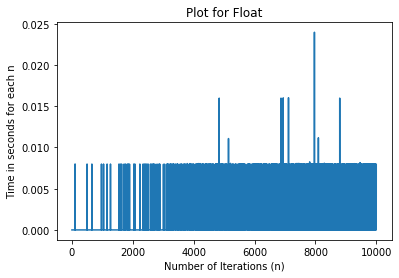

In [84]:
plt.plot(n_list2 , timings_float)
plt.xlabel('Number of Iterations (n)')
plt.ylabel('Time in seconds for each n')
plt.title("Plot for Float")
plt.show()

The reason we cannot avoid these complications this way is due to the inefficiency of the Sympy method. The same procedure using the floating point numbers will take approximaytely 10 minutes to execute from 1 to 100000 but the procedure using integers will take approximately 15 hours from 1 to 100000. This huge time difference by using integers is the reason for not avoiding these complications using sympy.

## Problem 4 (20 points):

For the first term of the conditional variance expression of the CIR process discused in the class:

$$f(\kappa) = \frac{r_0\sigma^2}{\kappa}(e^{-\kappa t} - e^{-2\kappa t})$$

1. compute its condition number, assuming $\kappa$ is the only variable, comment on whether the computation is stable around $\kappa = 0$
2. implement a function to compute the above expression, which is numerically stable around $\kappa = 0$. A typical approach is to switch to an approximation when $\kappa$ is smaller than a threshold $h$. Explain your choice of $h$, is the $h$ different for double or single precision calculation?  

## Problem 4 Solution:
The condition number is : $$\frac{(2t+1)\kappa(e^{-2\kappa t}) - (t+1)\kappa(e^{-\kappa t})}{e^{-\kappa t} - e^{-2\kappa t}}$$
The computation is not stable around $\kappa$ = 0 since the error amplifies as $\kappa$ tends to 0.

## Problem 5 (20 points):

Implement a matrix product function using hand coded loops in python, please feel free to use numpy array and numpy vector multiplications, but obviously you should not just call numpy matrix multiplication.

Compare the speed of your implementation to the numpy matrix product version, plot the difference in computational time with the size of the matrix.


Hint: 

* %timeit is a useful timing tool in IPython, or you can use time.clock() function
* numpy has two ways of representing matrix, one is array of arrays, another is matrix type. For array types, the matrix production is ```a.dot(b)```, for matrix type, the matrix production is ```a*b```. We recommend you to stick with array type to avoid any potential confusions. The ```a*b``` on array type is element wise multiplication. A common mistake is to use ```a*b``` for matrix production on array type. Please see the following code section as an example.
* numpy.allclose is a useful function to compare floating point calculation results


In [86]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = a + 1
print("a=\n", a)
print("\nb=\n", b)
c = a.dot(b) # matrix product
d = a*b #elment wise multiplication

print("\nc=a.dot(b)\n", c)
print("\nd=a*b\n", d)

a=
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

b=
 [[ 2  3  4]
 [ 5  6  7]
 [ 8  9 10]]

c=a.dot(b)
 [[ 36  42  48]
 [ 81  96 111]
 [126 150 174]]

d=a*b
 [[ 2  6 12]
 [20 30 42]
 [56 72 90]]


In [157]:
#from IPython.core.debugger import set_trace
# this method is only for multiplying square matrices
def matrix_multiplication(a,b):
    c = []
    for arr in enumerate(a):
        for arr_1 in enumerate(b.transpose()):
            vector_1 = np.array(arr)#extracting vectors from the matrix
            vector_2 = np.array(arr_1)
            #print(vector_1,vector_2)
            #set_trace()
            x = vector_1.dot(vector_2)# dot product of vectors extracted
            v = sum(x)# sum of elements in the array after dot product
            #print(v)
            c.append(v)#saving the elements into an empty list
    c = np.array(c)# converting list into array
    shape = (len(a),len(b))# getting dimensions of the resulting matrix
    c = c.reshape(shape) # arranging the resulting matrix
    return c# resulting matrix

a = np.array([[int(1),int(2),int(3)],[int(4),int(5),int(6)],[int(7),int(8),int(9)]])
b = a + int(1)    
print(matrix_multiplication(a,b))

d = a.dot(b)
print(d)

[[ 36  42  48]
 [ 81  99 117]
 [126 156 186]]
[[ 36  42  48]
 [ 81  96 111]
 [126 150 174]]


In [158]:
#function for timing the computation
def time_taken(f,a,b):
    import time
    start = time.time()# startingtime
    result = f(a,b)# performing the computation
    end = time.time() #ending time
    return start - end

In [160]:

def matrix_product_numpy(a,b):
    return a.dot(b) # the matrix multiplication using numpy
    



[[ 52156180  61936700  72684714]
 [103149092 123329207 145652826]
 [152293528 182153466 216454524]]
[[ 52156180  61936700  72684714]
 [103149092 123329204 145652820]
 [152293528 182153460 216454512]]
0.0 0.0


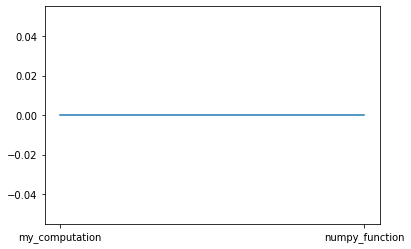

In [167]:
a = np.array([[1890, 2356, 3987], [4234, 5798, 6987], [7342, 8650, 9870]])
b = a + 1134
print(matrix_multiplication(a,b))
print(matrix_product_numpy(a,b))
s = time_taken(matrix_multiplication, a, b)# timing the computation
d = time_taken(matrix_product_numpy, a, b)
g = [s,d]
h = ['my_computation','numpy_function']
print(s,d)
plt.plot(h,g) #plotting the timings